In [1]:
import random as rnd

#ber is a function that 

def ber(p):
  x=rnd.random()
  if x <= p :
    return 1
  else:
    return 0

[ ber(1/3) for i in range(20)]

[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [2]:
from PIL import Image
from IPython.display import display

# Exercise 3.1

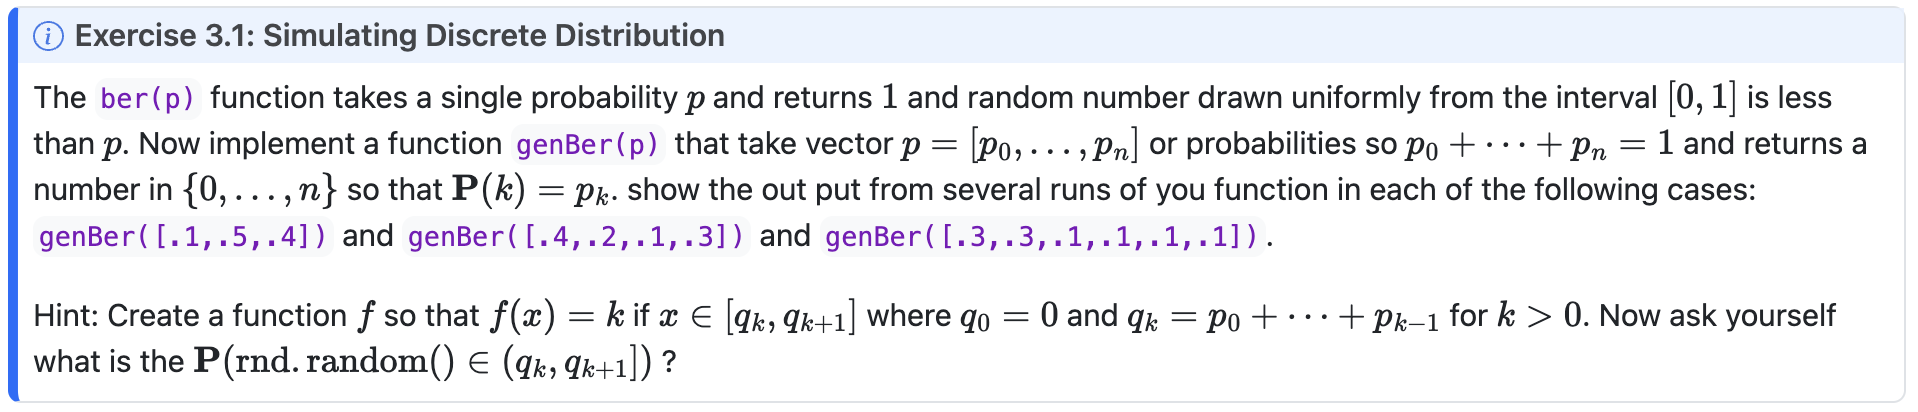

In [3]:
img = Image.open('ex3-1.png')
display(img)

In [4]:
'''
Calculate the cumulative sum of the probabilities:

q0 = 0
q1 = q0 + 0.1 = 0.1
q2 = q1 + 0.2 = 0.3
q3 = q2 + 0.3 = 0.6
q4 = q3 + 0.4 = 1.0

Generate a random number x between 0 and 1.

Determine which interval x falls into:

If x is between 0 and 0.1, return 0.
If x is between 0.1 and 0.3, return 1.
If x is between 0.3 and 0.6, return 2.
If x is between 0.6 and 1.0, return 3.

For example, if the random number x generated is 0.35, it falls between 0.3 and 0.6, so genBer(p) would return 2.

genBer([.1,.5,.4]) and genBer([.4,.2,.1,.3]) and genBer([.3,.3,.1,.1,.1,.1])

'''

def genBer(p, printDetails = False):
    x = rnd.random()

    if (printDetails):
        print("x = " + str(x))
        print("p = " + str(p))

    for i in range(0,len(p)):
        x = x - p[i]
        #print(i, x)
        if (x <= 0):
            return i  
    return -1

In [5]:
ret = genBer([.1,.5,.4], printDetails=True)

print("index = " + str(ret) + ", which means item " + str(ret+1) )

x = 0.553452985875975
p = [0.1, 0.5, 0.4]
index = 1, which means item 2


In [6]:
ret = genBer([.4,.2,.1,.3], printDetails=True)

print("index = " + str(ret) + ", which means item " + str(ret+1) )

x = 0.9260522513742205
p = [0.4, 0.2, 0.1, 0.3]
index = 3, which means item 4


In [7]:
ret = genBer([.3,.3,.1,.1,.1,.1], printDetails=True)

print("index = " + str(ret) + ", which means item " + str(ret+1) )

x = 0.6491072302125694
p = [0.3, 0.3, 0.1, 0.1, 0.1, 0.1]
index = 2, which means item 3


# Exercise 3.2

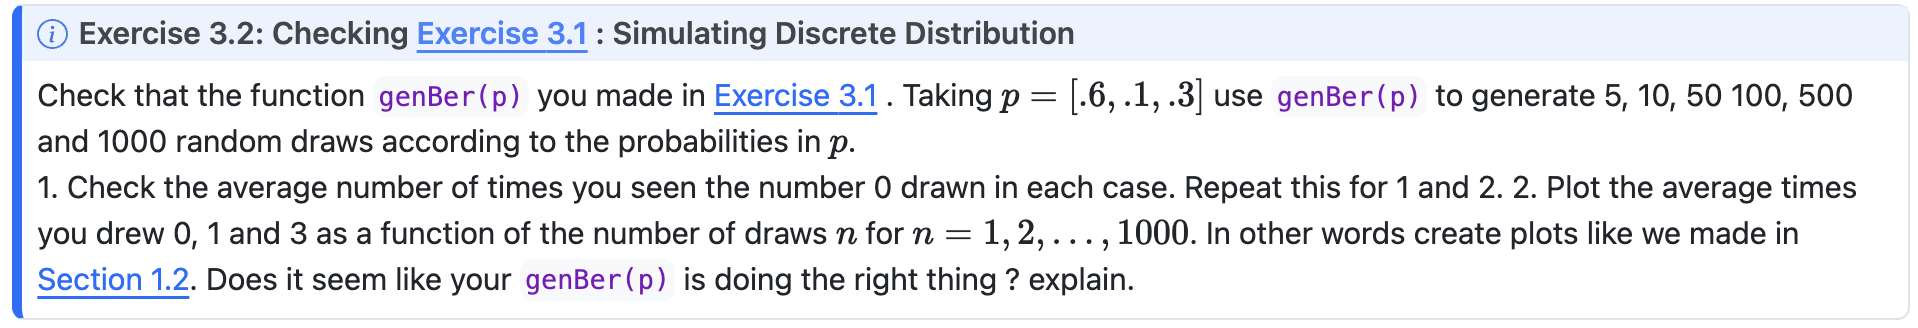

In [8]:
import matplotlib.pyplot as plt

img = Image.open('ex3-2.png')
display(img)

In [9]:
p = [0.6, 0.1, 0.3]

In [10]:
# this is a function that can draw numDraws times and take a list of proabilities
# such as p above and then print some info + a graph
def drawNPlot(numDraws, probabilityList):
    drawList = []

    _0freq = []
    num0 = 0

    _1freq = []
    num1 = 0

    _2freq = []
    num2 = 0

    for i in range(numDraws):
      draw = genBer(probabilityList)
      drawList.append(draw)

      if draw == 0:
        num0 += 1
      elif draw == 1:
        num1 += 1
      elif draw == 2:
        num2 += 1
        
      _0freq.append(num0/(i+1)) # this is percentage of all draws that are 0.
      _1freq.append(num1/(i+1))
      _2freq.append(num2/(i+1))
  
    #print out frequency
    print(f"{num0} zeros, {num1} ones, {num2} twos in {numDraws} samples.")
    print("The observed fraction of zeros is {:.4g}".format(num0/numDraws))
    print("The observed fraction of ones is {:.4g}".format(num1/numDraws))
    print("The observed fraction of twos is {:.4g}".format(num2/numDraws))
    
    # Make Plots
    plt.plot(range(1, numDraws+1), _0freq, label='Label for 0 freq')
    plt.plot(range(1, numDraws+1), _1freq, label='Label for 1 freq')
    plt.plot(range(1, numDraws+1), _2freq, label='Label for 2 freq')

    #labels and stuff
    plt.xlabel("Number of Samples")
    plt.ylabel("Observed frequencies")
    plt.title("{:,} samples : run 1".format(numDraws))
    
    plt.legend()
    plt.show()

3 zeros, 0 ones, 2 twos in 5 samples.
The observed fraction of zeros is 0.6
The observed fraction of ones is 0
The observed fraction of twos is 0.4


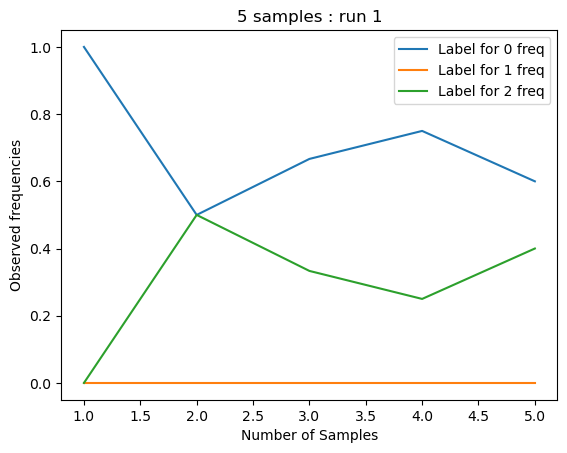

In [11]:
#running for 5 draws
drawNPlot(5,p)

7 zeros, 0 ones, 3 twos in 10 samples.
The observed fraction of zeros is 0.7
The observed fraction of ones is 0
The observed fraction of twos is 0.3


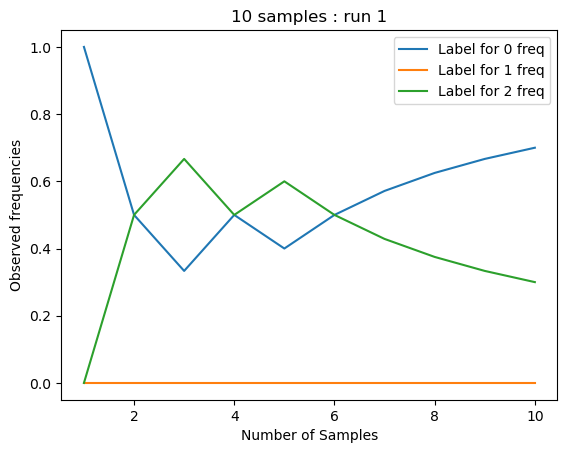

In [12]:
#running for 10 draws
drawNPlot(10,p)

35 zeros, 1 ones, 14 twos in 50 samples.
The observed fraction of zeros is 0.7
The observed fraction of ones is 0.02
The observed fraction of twos is 0.28


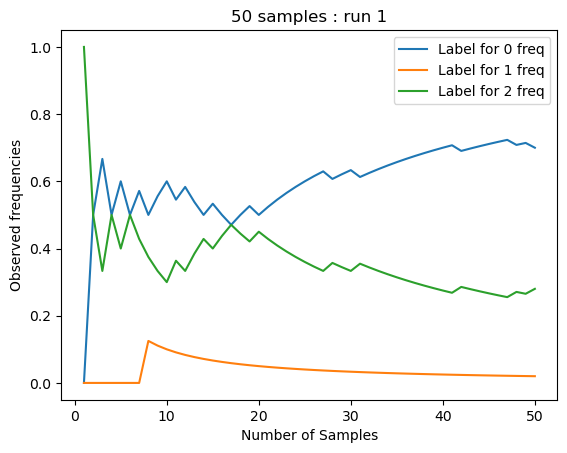

In [13]:
#running for 50 draws
drawNPlot(50,p)

59 zeros, 9 ones, 32 twos in 100 samples.
The observed fraction of zeros is 0.59
The observed fraction of ones is 0.09
The observed fraction of twos is 0.32


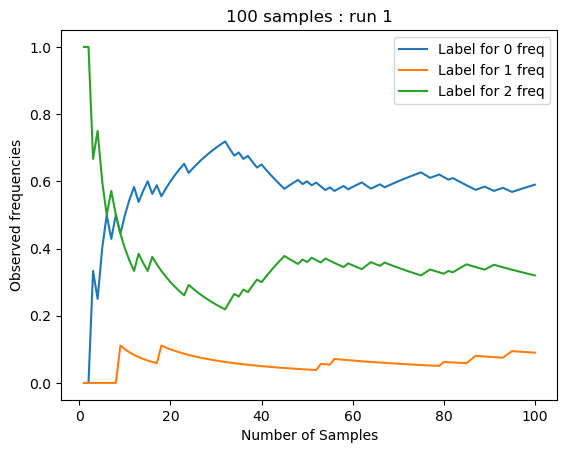

In [14]:
#running for 100 draws
drawNPlot(100,p)

302 zeros, 52 ones, 146 twos in 500 samples.
The observed fraction of zeros is 0.604
The observed fraction of ones is 0.104
The observed fraction of twos is 0.292


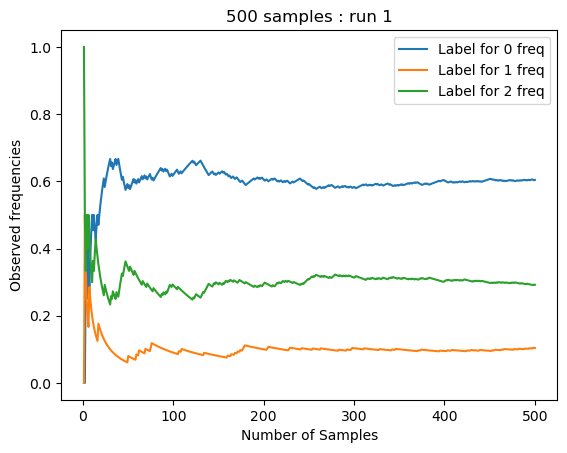

In [15]:
#running for 500 draws
drawNPlot(500,p)

612 zeros, 85 ones, 303 twos in 1000 samples.
The observed fraction of zeros is 0.612
The observed fraction of ones is 0.085
The observed fraction of twos is 0.303


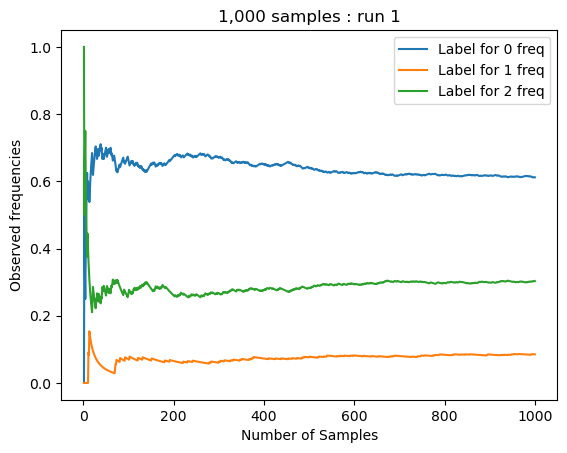

In [16]:
#running for 1000 draws
drawNPlot(1000,p)

This is doing the correct thing, as the number of samples get higher, the probability of each number tends closer to the probability array we defined earlier

# Exercise 3.5

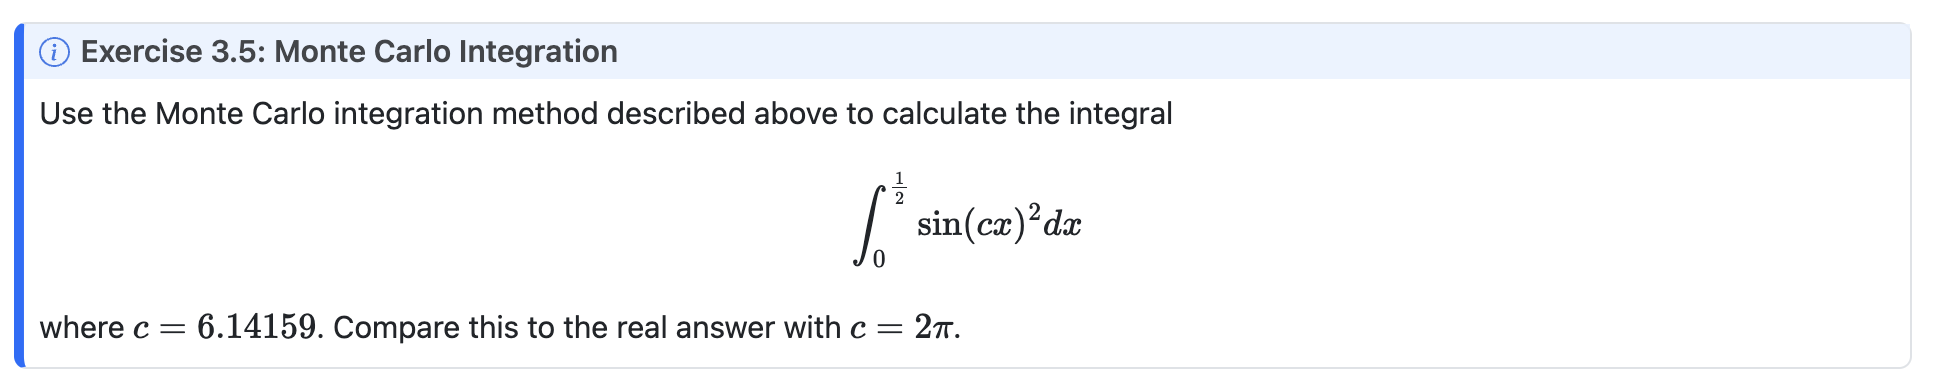

In [17]:
img = Image.open('ex3-5.png')
display(img)

In [18]:

def monteCarlo(f, boxX, boxY, area, numberSamples=10000, showPlot=True):
    samplesIn=[]
    samplesOut=[] 

    for k in range(numberSamples):
        x = boxX()
        y = boxY()

        if f(x) > y:  # Check to see if point is below curve y=f(x)
            samplesIn.append([x,y]) # point below
        else:
            samplesOut.append([x,y]) # point above

    numIn=len(samplesIn)    # number of points below
    numOut=len(samplesOut)  # number of points above

    ratioIn = numIn/numberSamples # = P(R)
    totalArea = area()

    # P(R) = Area(R) / Area(Box)

    # Area(R) = Area(Box) * P(R)

    # print(totalArea)

    areaRegion = ratioIn * totalArea

    if (showPlot):
        print("Out of {:,} samples, {:,} are in the blue region under \n \t the curve  and {:,} are above.".format(numberSamples,numIn,numOut))
        print("Hence fraction of the samples below the curve is {:,} \n \t and the fraction above is {:,}.".format(numIn/numberSamples,numOut/numberSamples))
        print()
        print("Hence our esitmate of the area under the curve is {:}.".format(areaRegion))

        x_samplesIn=[ p[0] for  p in samplesIn]
        y_samplesIn=[ p[1] for  p in samplesIn]

        x_samplesOut=[ p[0] for  p in samplesOut]
        y_samplesOut=[ p[1] for  p in samplesOut]

        plt.scatter(x_samplesOut,y_samplesOut,color='black',s=3)
        plt.scatter(x_samplesIn,y_samplesIn,color='lightblue',s=3)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

    #monteCarlo estimate of region for num samples
    
    return areaRegion

In [19]:
import math

def function(x):
    c = 6.14159
    return math.sin( c * x ) ** 2

#integrate from 0 to half
def boxX():
    return (1/2)*rnd.random()

# goes from 0 to 1 in height
def boxY():
    return rnd.random()

# box area = 1* (1/2)
def area():
    return 1/2


Out of 10,000 samples, 5,134 are in the blue region under 
 	 the curve  and 4,866 are above.
Hence fraction of the samples below the curve is 0.5134 
 	 and the fraction above is 0.4866.

Hence our esitmate of the area under the curve is 0.2567.


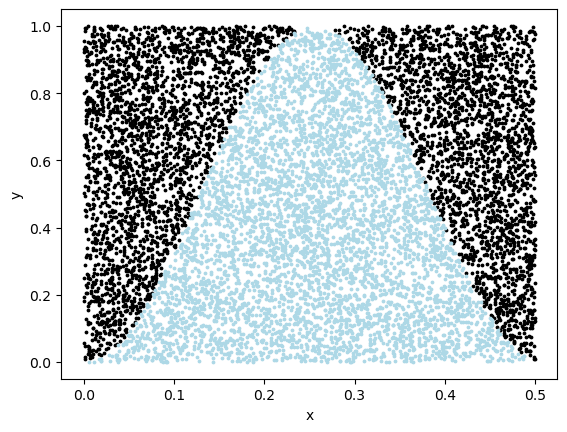

0.2567

In [20]:

monteCarlo(function, boxX, boxY, area)

Actual answer is meant to be 0.25574454803615 with c = 6.14159, so this is pretty good

Out of 10,000 samples, 4,962 are in the blue region under 
 	 the curve  and 5,038 are above.
Hence fraction of the samples below the curve is 0.4962 
 	 and the fraction above is 0.5038.

Hence our esitmate of the area under the curve is 0.2481.


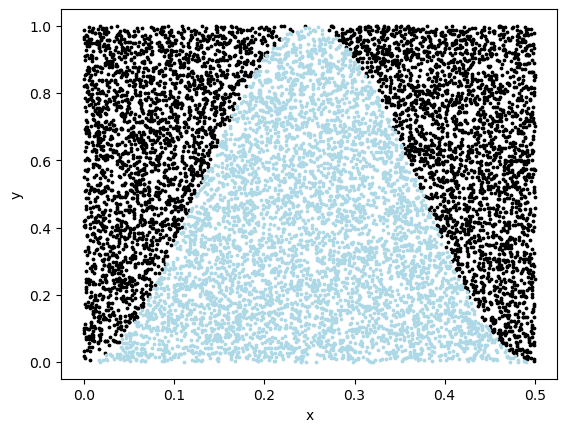

0.2481

In [21]:
# with c = 2pi

def function(x):
    c = 2* math.pi
    return math.sin( c * x ) ** 2

monteCarlo(function, boxX, boxY, area)

pretty similar. (was c meant to be 6.28... like approx 2*pi?)

# Exercise 3.5

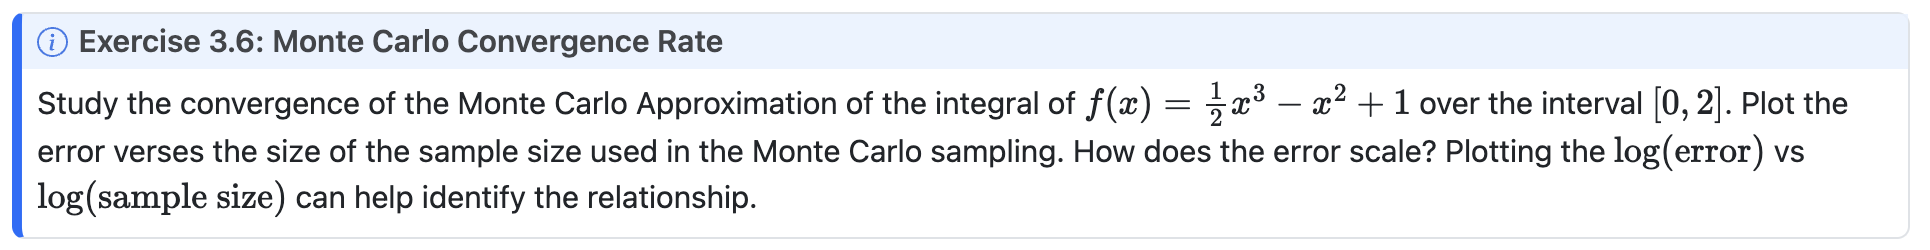

In [22]:
img = Image.open('ex3-6.png')
display(img)

In [23]:
import numpy as np

def monteCarloConvergence(f, boxX, boxY, area, realVal, maxSampleSize):
    errorOverSamples = []
    runningAvgError = []

    for i in range(maxSampleSize):
      draw = monteCarlo(f,boxX,boxY,area,numberSamples=i+1, showPlot=False)

      tempError = abs(realVal() - draw)

      errorOverSamples.append(tempError)
      
      if (len(runningAvgError) != 0):
        runningAvgError.append( ( i * runningAvgError[i-1]+tempError)/i+1 )
      else:
        runningAvgError.append(tempError)
  
    # #print out frequency
    # print(f"{num0} zeros, {num1} ones, {num2} twos in {numDraws} samples.")
    # print("The observed fraction of zeros is {:.4g}".format(num0/numDraws))
    # print("The observed fraction of ones is {:.4g}".format(num1/numDraws))
    # print("The observed fraction of twos is {:.4g}".format(num2/numDraws))
    
    # Make Plots
    plt.plot(range(1, maxSampleSize+1), errorOverSamples)

    #labels and stuff
    plt.xlabel("Number of Samples")
    plt.ylabel("Error")
    plt.title("{:,} Error against num samples".format(maxSampleSize))
    
    plt.legend()
    plt.show()

    plt.loglog(range(1, maxSampleSize+1), errorOverSamples)

    #labels and stuff
    plt.xlabel("Number of Samples")
    plt.ylabel("Error")
    plt.title("Error against number of samples")
    
    plt.show()

    

In [24]:
def function(x):
    return (1/2) * (x**3) - (x**2) + 1

#integrate from 0 to half
def boxX():
    return (2)*rnd.random()

# goes from 0 to 1 in height
def boxY():
    return rnd.random()

# box area = 1* (1/2)
def area():
    return 2

def realVal():
    return 4/3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


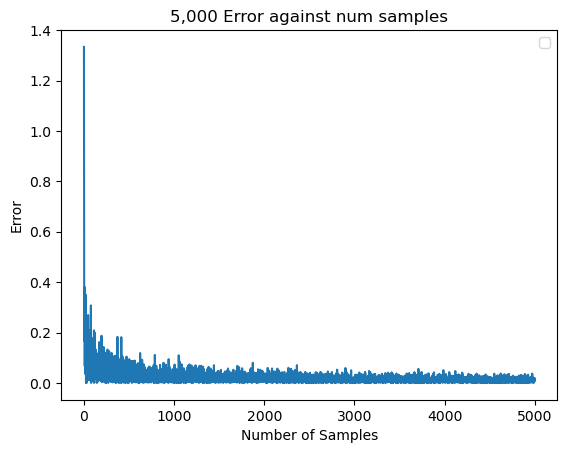

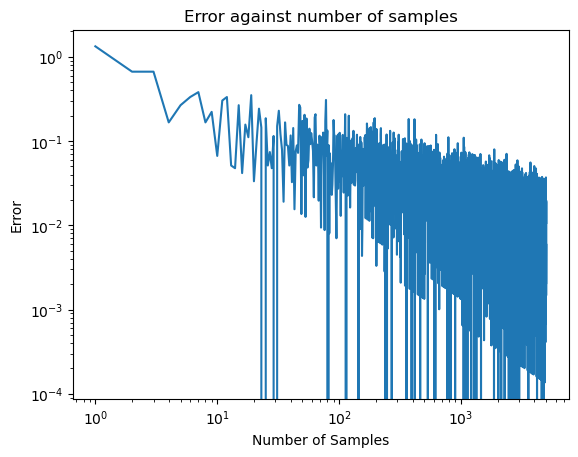

In [25]:
monteCarloConvergence(function, boxX, boxY, area, realVal, maxSampleSize=5000)

error very clearly decreases as number of samples increases

# Homework question 4

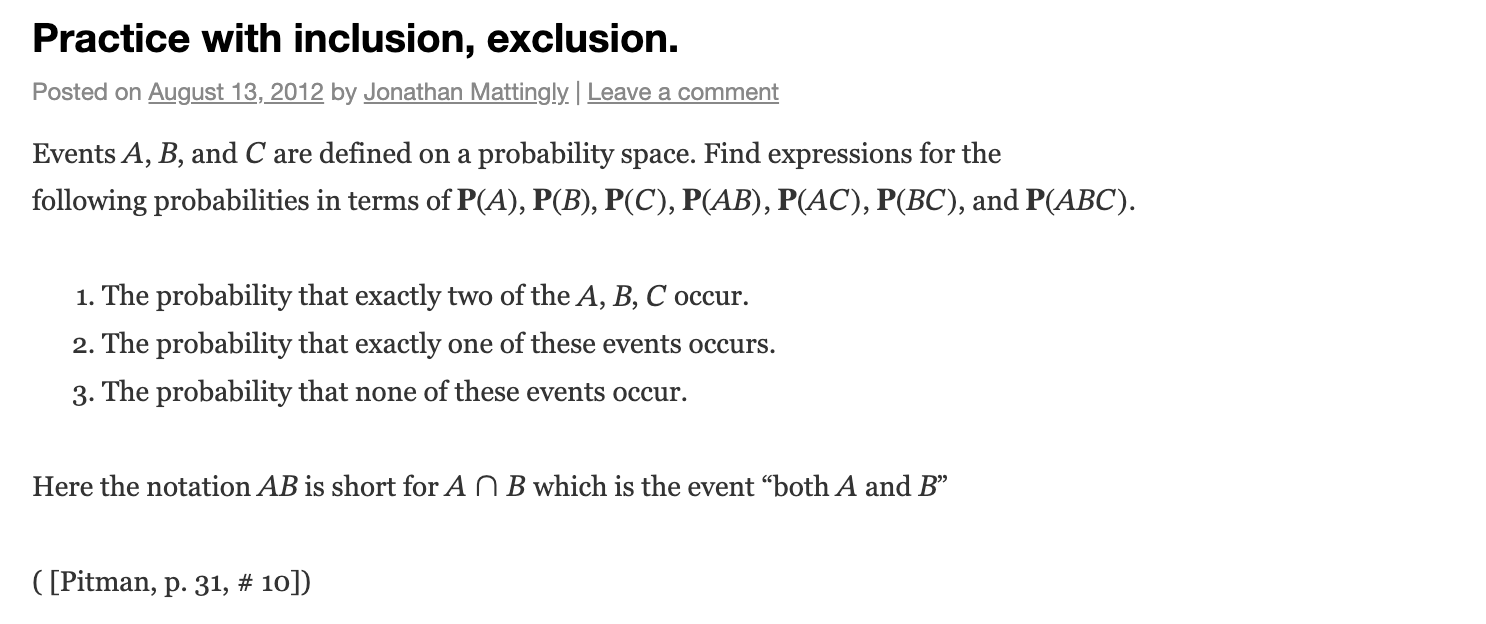

In [26]:
img = Image.open('HWq4.png')
display(img)

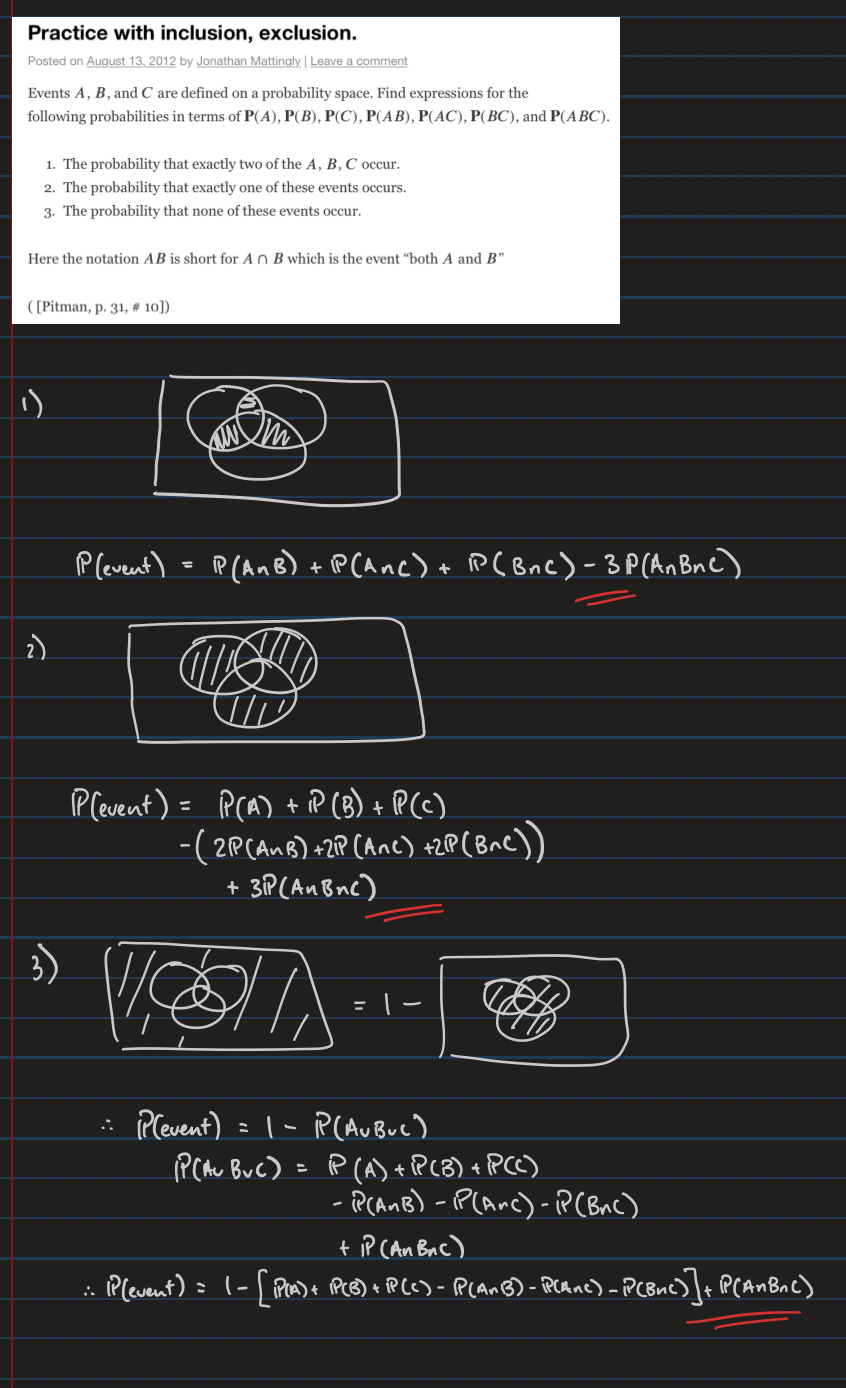

In [27]:
img = Image.open('HWa4.png')
display(img)